<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#**Cluster Analysis**

คือการที่เรามี data มาแล้วเราต้องการจะจัดกลุ่มของ data นั้นๆ เราจะแบ่งลักษณะของ data ที่เหมาะกัน ให้อยู่กลุ่มเดียวกัน 

เช่น การวัดระยะห่างระหว่างจุด เราก็จะนำระยะห่างนั้นมาเป็นการแบ่งกลุ่ม

จัดข้อมูลที่อยู่ใกล้กันให้เป็นกลุ่มเดียวกัน 

In [3]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


ตัดคอลัมน์

## ตัด column สุดท้าย ที่เป็น Class ของข้อมูลออก

In [4]:
example_df_drop = example_df.iloc[:,:-1]
example_df_drop

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
##  Kmean ### Import

##**Execution of the k-means clustering algorithm**

**พารามิเตอร์ คือ K**

จัดกลุ่มโดยการวัดระยะห่าง และาาเพนนะทนรพทนาทะ้าพทท

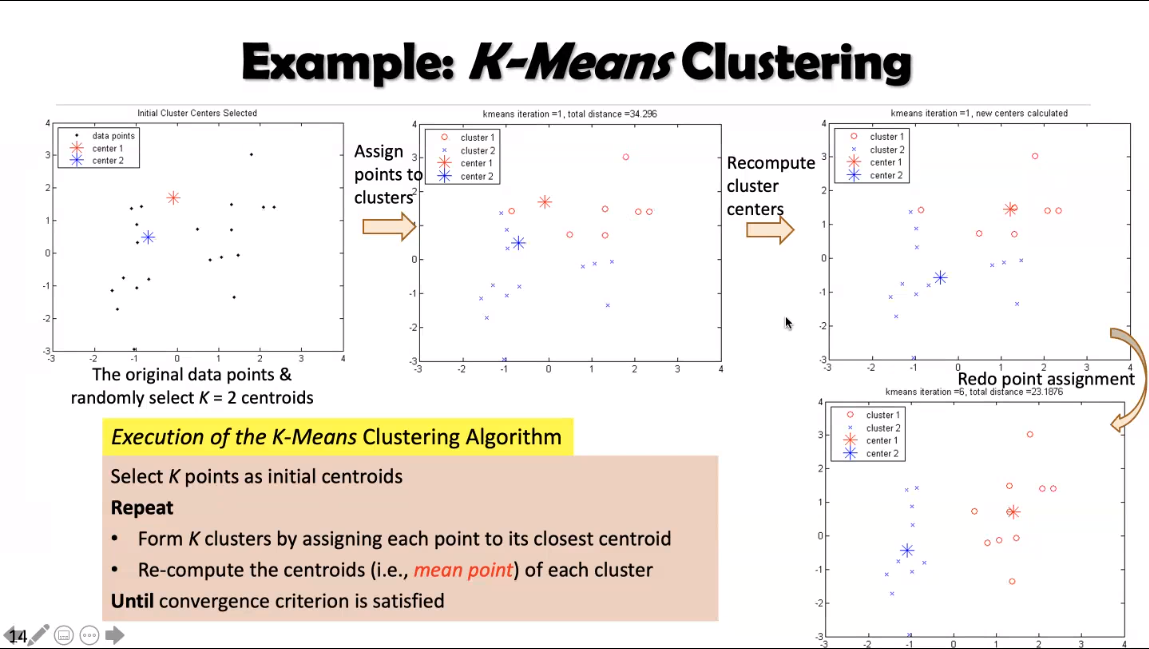

ลำดับแรก คือ ตั้ง จุดกลาง ของกลุ่ม
ลำดับทีสอง คือ วัดระยะห่างของข้อมูลกับจุดกลางของแต่ละกลุ่มเพื่อจัดกลุ่ม
ลำดับที่สาม คือ หาเซนเตอร์ใหม่จากการหาค่าเฉลียของกลุ่ม 
ลำดับที่ 4 คือ วัดระยะห่างเพื่อจัดกลุ่มใหม่อีกรอบ


In [6]:
from sklearn.cluster import KMeans

### Difine

random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

In [7]:
kmeans = KMeans(random_state=2021) #กำหนดเคมีนให้สุ่มเป็นจุดเดียวกัน

### Fit- transform 
#### คำนวณจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering

In [8]:
kmeans.fit(example_df_drop)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

### แสดงจุด cluster centers ที่คำนวณออกมาได้

In [9]:
kmeans.cluster_centers_

array([[5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444]])

### ทดสอบการจัดกลุ่มของ Data 

In [10]:
y = kmeans.predict(example_df_drop)
y

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 4, 1, 4, 1, 6, 1, 4, 6, 4, 4, 1, 4, 1,
       4, 4, 1, 4, 7, 4, 7, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 7, 4, 1, 1, 1,
       4, 4, 4, 1, 4, 6, 4, 4, 4, 1, 6, 4, 5, 7, 2, 5, 5, 2, 4, 2, 5, 2,
       5, 7, 5, 7, 7, 5, 5, 2, 2, 7, 5, 7, 2, 7, 5, 2, 7, 7, 5, 2, 2, 2,
       5, 7, 7, 2, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 7], dtype=int32)

ทดสอบการจัดกลุ่ม

Quiz6 ทำ PCA ข้อมูล example_df_drop แล้ววาดกราฟ scatter plot

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(example_df_drop)

In [12]:
from matplotlib import pyplot as plt

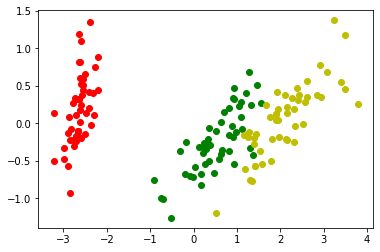

In [13]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

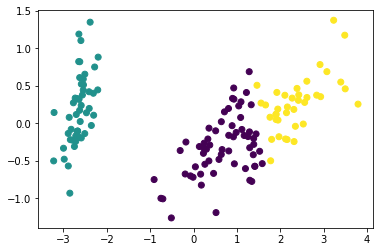

In [14]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

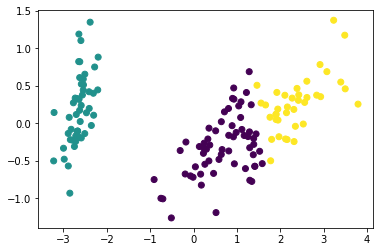

In [15]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

http://it.nation.ac.th/faculty/danai/download/statistics%20talks23.pdf

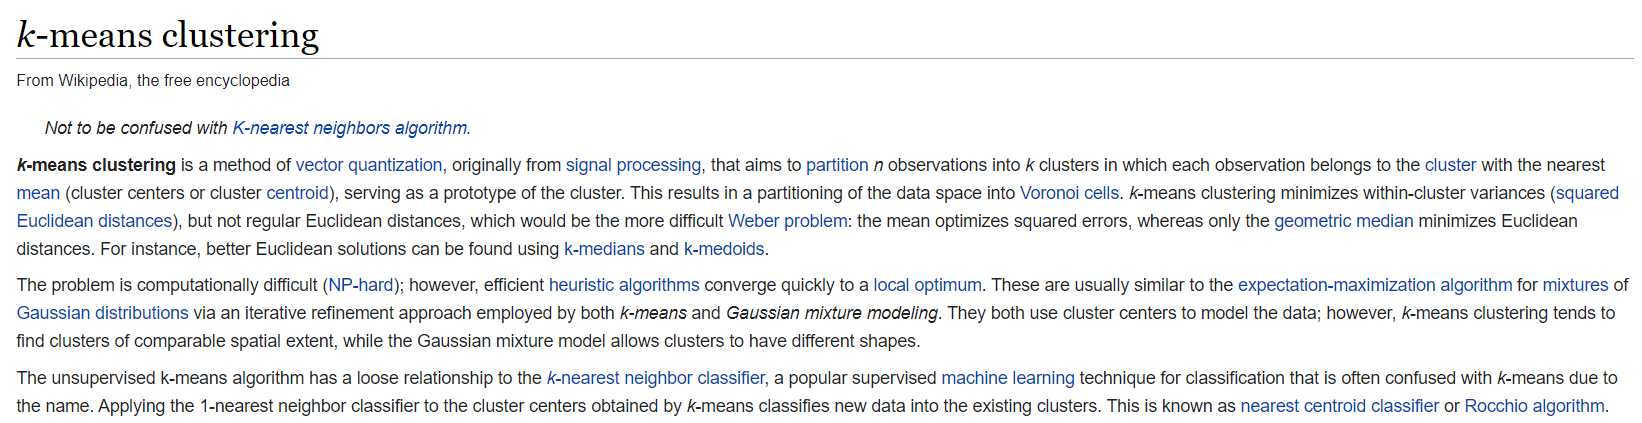

##**SSE**

In [16]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [17]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)

In [18]:
new_cluster_center

array([[ 0.67443933, -0.31390945],
       [-2.64084076,  0.19051995],
       [ 2.37438946,  0.2614839 ]])

In [19]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(kmeans.cluster_centers_[:], kmeans.cluster_centers_[])

SyntaxError: ignored

##กรณีเราใช้ค่า Default

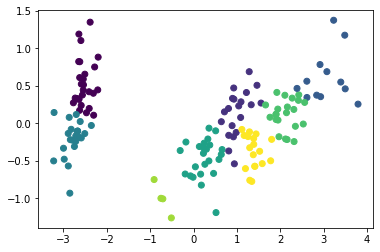

In [20]:
kmeans = KMeans(random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

**ค่า K ควรจะเป็นเท่าไหร่????**


https://realpython.com/k-means-clustering-python/#choosing-the-appropriate-number-of-clusters

#**Elbow Method**

##**SSE**

In [21]:
kmeans.inertia_ ## Sum of Squared Errors

29.955568877177576

In [22]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    XX = kmeans.fit(example_df_drop)
    SSE.append(kmeans.inertia_)

In [23]:
SSE

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.18920546865627,
 29.955568877177576]

Text(0, 0.5, 'SSE')

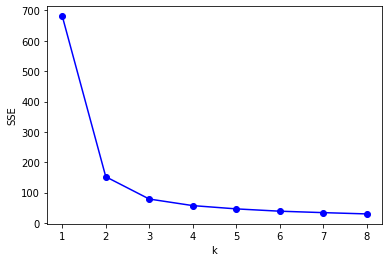

In [27]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE')

Silhouette coefficient
How close the data point is to other points in the cluster 

:**จุดในกลุ่มของตัวมันเองใกล้กันแค่ไหน**

How far away the data point is from points in other clusters 

:**จุดของแต่ละกลุ่มที่ไม่ได้อยู่กลุ่มเดียวกันไกลกันแค่ไหน**

In [28]:
from sklearn import metrics

In [29]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(example_df_drop)
    score = metrics.silhouette_score(example_df_drop,kmeans.labels_)
    SilH.append(score)

Text(0, 0.5, 'Silhouette Score')

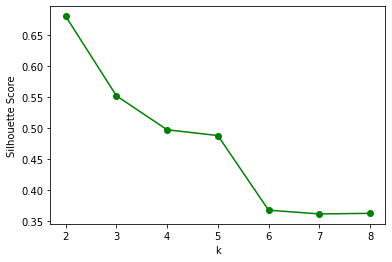

In [30]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score')